# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceuticals_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID","Mouse ID"])

# Display the data table for preview
pymaceuticals_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice = pymaceuticals_df['Mouse ID'].unique()
mice.size

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint.
time_point = pymaceuticals_df[['Mouse ID', 'Timepoint']]
time_point

#I need to determine a way to get info that has duplicate results

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [4]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = time_point.loc[time_point.duplicated() == True]
duplicate_mouse


,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = pymaceuticals_df[pymaceuticals_df['Mouse ID'] == 'g989']
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = pymaceuticals_df.loc[pymaceuticals_df['Mouse ID'] != 'g989']
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice = clean_data['Mouse ID'].unique()
cleaned_mice.size

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_data = clean_data.groupby(['Drug Regimen'])
tumor_volume_data = summary_data['Tumor Volume (mm3)']

mean_volume = tumor_volume_data.mean()
median_volume = tumor_volume_data.median()
variance_volume = tumor_volume_data.var()
sd_volume = summary_data['Tumor Volume (mm3)'].apply(np.std) 
sem_volume = summary_data['Tumor Volume (mm3)'].apply(st.sem)

#std_by_regimen = df.groupby('Regimen')['Tumor Volume'].apply(np.std)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
            'Mean Tumor Volume': mean_volume,
            'Median Tumor Volume': median_volume,
            'Tumor Value Variance': variance_volume,
            'Tumor Volume Std. Dev.': sd_volume,
            'Tumor Volume Std. Err.': sem_volume
            })
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Value Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.250556,0.469821
Infubinol,52.884795,51.820584,43.128684,6.548770,0.492236
Ketapril,55.235638,53.698743,68.553577,8.257659,0.603860
Naftisol,54.331565,52.509285,66.173479,8.112811,0.596466
Placebo,54.033581,52.288934,61.168083,7.799368,0.581331
Propriva,52.320930,50.446266,43.852013,6.599675,0.544332
Ramicane,40.216745,40.673236,23.486704,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.689090,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_data.agg({'Tumor Volume (mm3)':["mean", "median", "var", "std", "sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

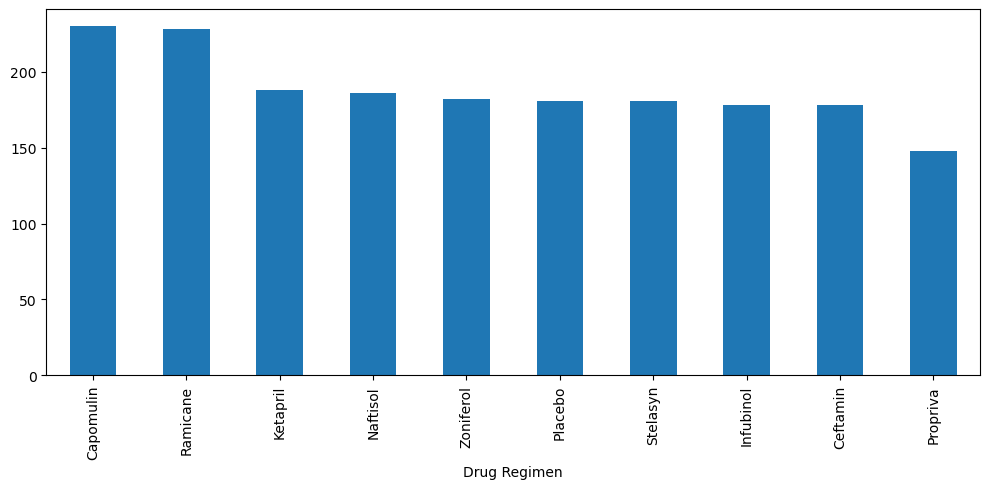

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
multi_plot = clean_data['Drug Regimen'].value_counts().plot(kind="bar", figsize=(10,5))
plt.tight_layout()
plt.show()

#x_axis = clean_data['Drug Regimen'].unique()
#plt.bar(x_axis, summary_data['Drug Regimen'].value_counts())
#plt.tight_layout()


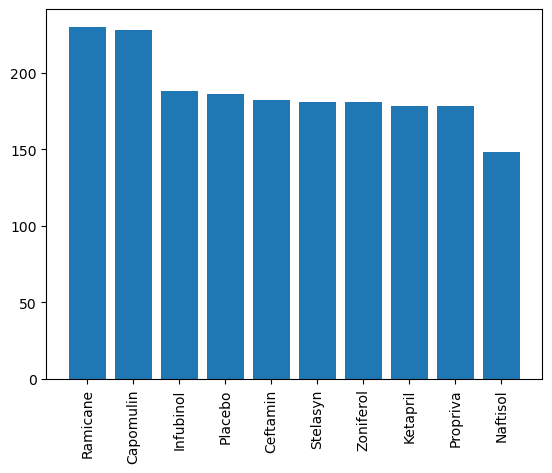

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = clean_data['Drug Regimen'].unique()
plt.bar(x_axis, clean_data['Drug Regimen'].value_counts())
plt.xticks(rotation="vertical")
plt.show()

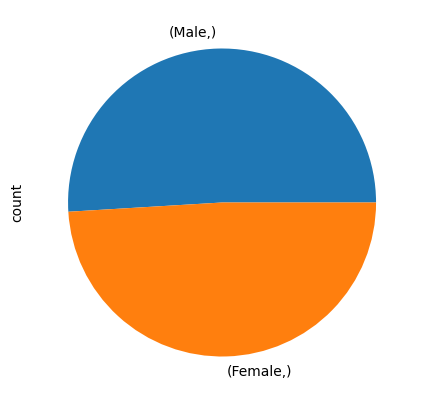

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_data['Sex']
gender = pd.DataFrame(gender)
multi_plot = gender.value_counts().plot(kind='pie', figsize=(10,5))




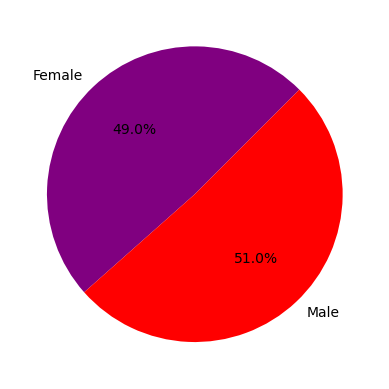

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_data = gender.value_counts()
#plt.pie(gender_data)
#plt.show
labels = ["Female", "Male"]
gender_value = [gender_data['Female'], gender_data['Male']]
colors = ["purple", "red"]

plt.pie(gender_value, labels=labels, colors=colors, autopct="%1.1f%%", startangle=45)
plt.show()




## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
regimens =  ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [15]:

last_occurances = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_occurances

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [16]:
final_tumor_volume = pd.merge(last_occurances, clean_data, on=["Mouse ID","Timepoint"])
final_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [43]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)

box_plot_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    plot_data = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    box_plot_data.append(plot_data)
    
    # Determine outliers using upper and lower bounds


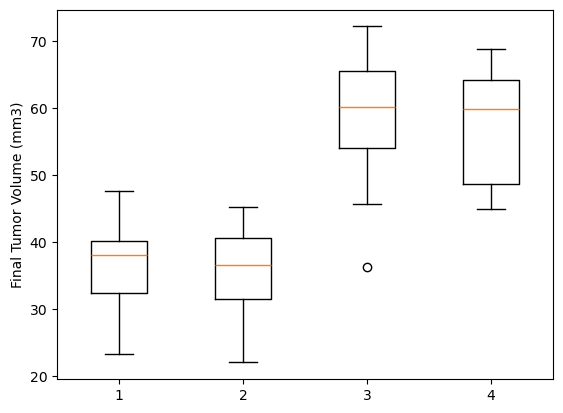

In [44]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(box_plot_data)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

In [19]:
#IQR 

#outliers = []

#quartiles = box_plot_data[0].quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq
#print(f'{treatment} potential outliers: {lowerq}')

#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)

#for treatment in regimens:
#    outlier = box_plot_data[(upper_bound) < (box_plot_data[0]) < (lower_bound)]
#    outliers.append(outlier)
    
#outliers    


## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
capomulin_mice
capomulin_mouse = clean_data.loc[clean_data['Mouse ID'] == 'i557']
capomulin_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
431,i557,Capomulin,Female,1,24,0,45.000000,0
432,i557,Capomulin,Female,1,24,5,42.261665,0
433,i557,Capomulin,Female,1,24,10,42.992077,0
434,i557,Capomulin,Female,1,24,15,43.529876,0
435,i557,Capomulin,Female,1,24,20,43.967895,0
436,i557,Capomulin,Female,1,24,25,44.596219,0
437,i557,Capomulin,Female,1,24,30,45.261384,0
438,i557,Capomulin,Female,1,24,35,45.941949,0
439,i557,Capomulin,Female,1,24,40,46.821070,1
440,i557,Capomulin,Female,1,24,45,47.685963,1


<function matplotlib.pyplot.show(close=None, block=None)>

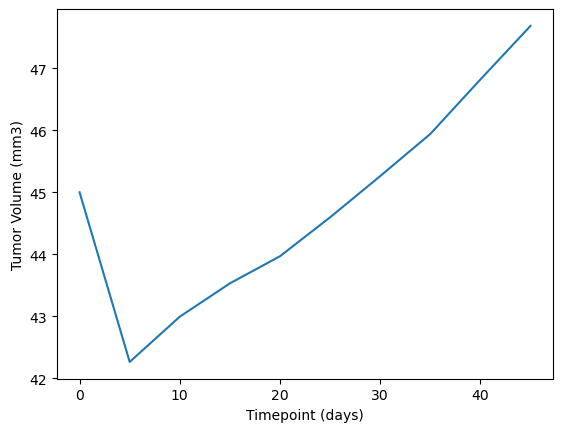

In [35]:
x_values = capomulin_mouse['Timepoint']
y_values = capomulin_mouse['Tumor Volume (mm3)']
plt.plot(x_values, y_values)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

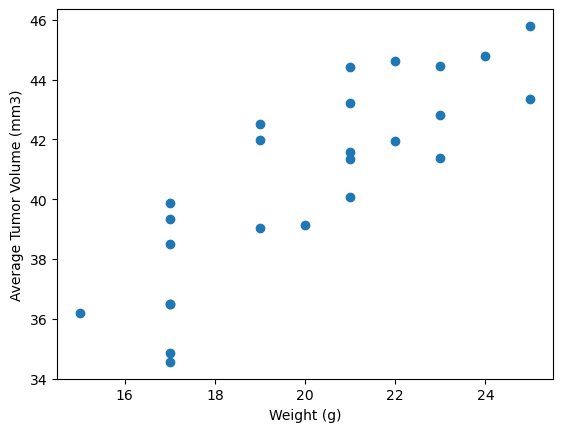

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

x_value = capomulin_mice.groupby('Mouse ID')["Weight (g)"].unique()
y_value = capomulin_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
#print(y_value)
#print(x_value)
plt.scatter(x_value, y_value)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show

## Correlation and Regression

The correlation between mouse weight and average observed tumor volume for the entire Capomulini regimen is [0.84116671]


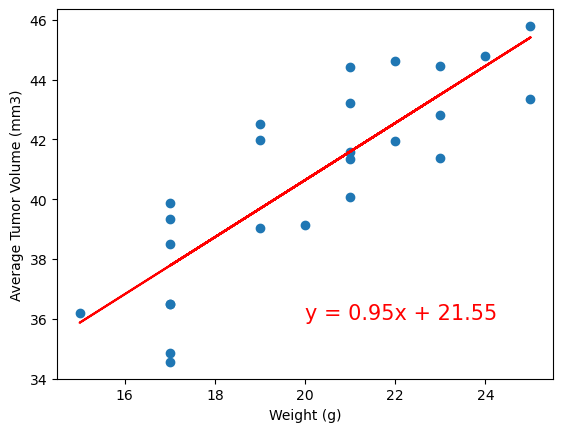

In [47]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x_value, y_value)
correlation
print(f"The correlation between mouse weight and average observed tumor volume for the entire Capomulini regimen is {(correlation[0])}")

#Print dataframes to determine datatype before linregress function. 
#print(y_value)
#print(x_value)
new_x_value = x_value.astype('float')
response = linregress(new_x_value, y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(new_x_value, y_value)
regress_values = new_x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(new_x_value, y_value)
plt.plot(new_x_value,regress_values, "r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()